In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# 2. Load Dataset (Excel)
df = pd.read_excel(r"C:\xml\Netflix Dataset.xlsx") 

In [4]:
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [5]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")

In [6]:
print("\nCategory Distribution:\n", df['Category'].value_counts())
print("\nTop 5 Countries:\n", df['Country'].value_counts().head(5))
print("\nDataset covers years from", df['Year'].min(), "to", df['Year'].max())


Category Distribution:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

Top 5 Countries:
 Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64

Dataset covers years from 2008.0 to 2021.0


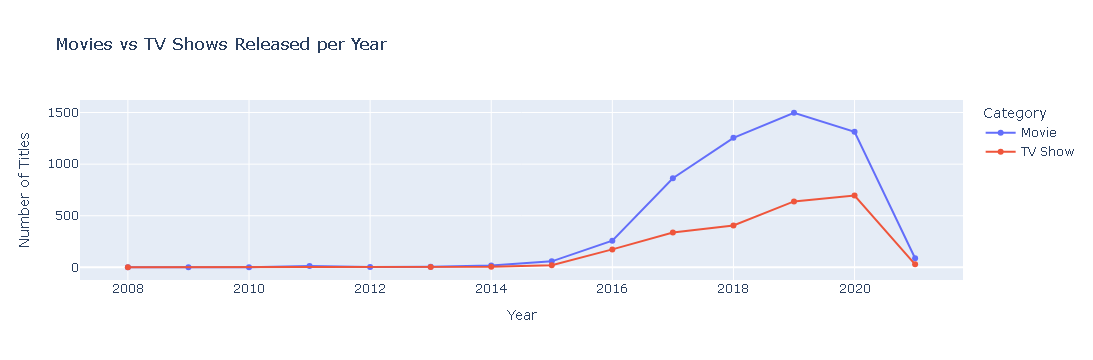

In [7]:
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
fig1 = px.line(content_trend, x='Year', y='Count', color='Category', 
               markers=True, title="Movies vs TV Shows Released per Year",
               labels={'Count': 'Number of Titles', 'Year': 'Year'})
fig1.show()


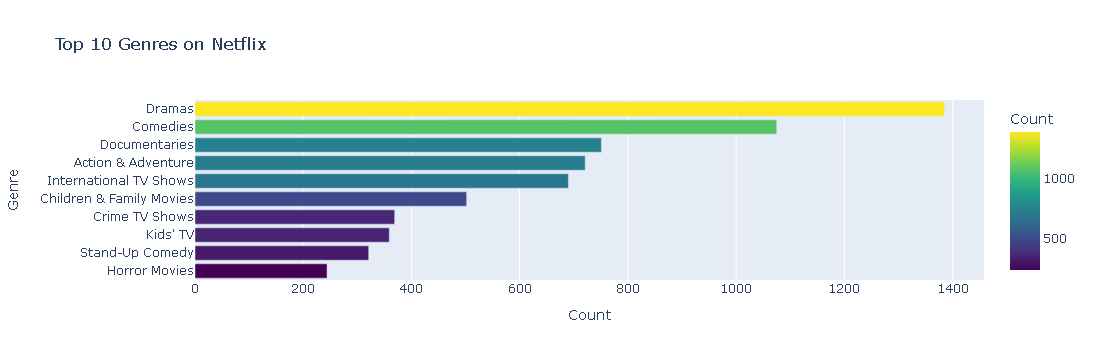

In [8]:
top_genres = df['Main_Genre'].value_counts().head(10).reset_index()
top_genres.columns = ['Genre', 'Count']
fig2 = px.bar(top_genres, x='Count', y='Genre', orientation='h', 
              color='Count', color_continuous_scale='Viridis',
              title="Top 10 Genres on Netflix")
fig2.update_layout(yaxis={'categoryorder':'total ascending'})
fig2.show()


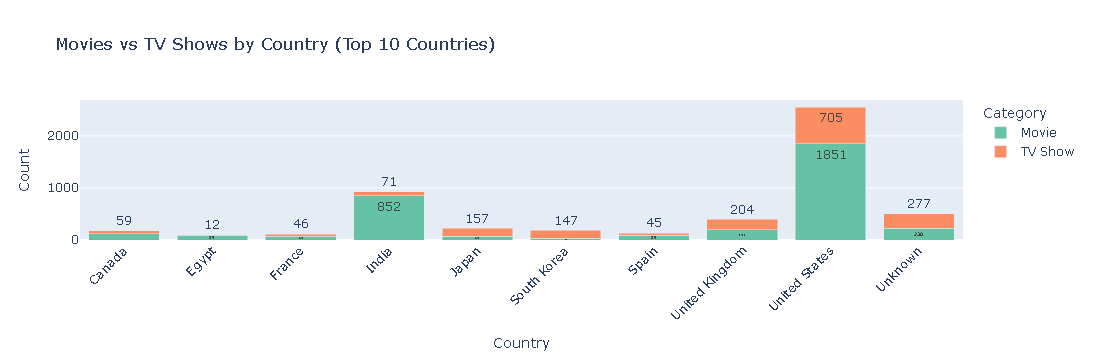

In [9]:
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().reset_index(name='Count')
fig3 = px.bar(stacked, x='Country', y='Count', color='Category', 
              title="Movies vs TV Shows by Country (Top 10 Countries)",
              text='Count', barmode='stack', color_discrete_sequence=px.colors.qualitative.Set2)
fig3.update_layout(xaxis_tickangle=-45)
fig3.show()

C:\Users\vsrau\AppData\Local\Temp\ipykernel_14216\3711616206.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



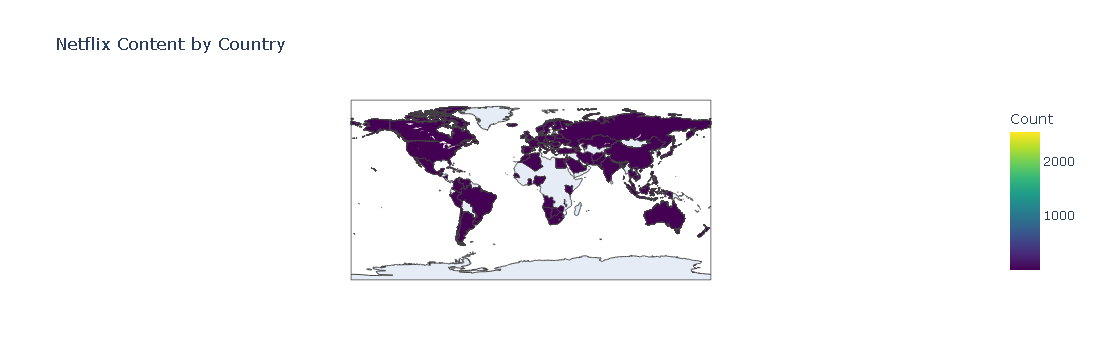

In [10]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig4 = px.choropleth(country_counts, locations="Country", locationmode="country names",
                     color="Count", hover_name="Country",
                     color_continuous_scale="Viridis",
                     title="Netflix Content by Country")
fig4.show()

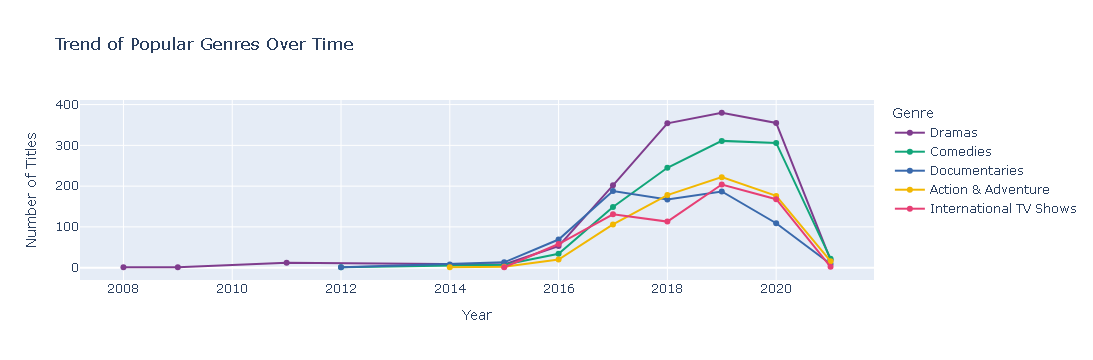

In [11]:
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['Year','Main_Genre']).size().reset_index(name='Count')
fig5 = px.line(genre_trends, x='Year', y='Count', color='Main_Genre', markers=True,
               title="Trend of Popular Genres Over Time",
               labels={'Count':'Number of Titles','Year':'Year','Main_Genre':'Genre'},
               color_discrete_sequence=px.colors.qualitative.Bold)
fig5.show()